In [1]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

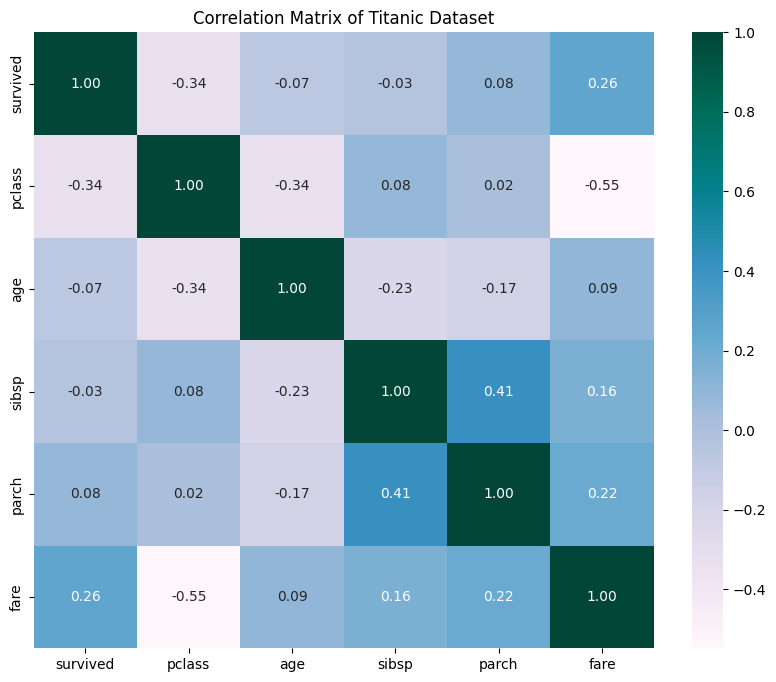

In [2]:
# Loading dataset

df = sns.load_dataset('titanic')

# Examining the data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# print(df.info())
# print(df.head(10))
# print(df.tail(10))
# print(df.shape)
# print(df.columns)

unique_counts = df.nunique()
# print(unique_counts)

survived_unique_values = df['survived'].unique()
# print(survived_unique_values)
# print(f"The 'survived' column has {survived_unique_values} unique values.")

sex_unique_values = df['sex'].unique()
# print(sex_unique_values)
# print(f"The 'sex' column has {sex_unique_values} unique values.")

gender_value_counts = df['sex'].value_counts()
# print(gender_value_counts)

survived_value_counts = df['survived'].value_counts()
# print(survived_value_counts)

grouped_data = df.groupby(['sex', 'survived'])['survived'].count()
# print(grouped_data)

# Survival by passenger class
class_survived_counts = df.groupby(['pclass', 'survived'])['survived'].count()
# print(class_survived_counts)

embarked_class_survived_counts = df.groupby(['embark_town', 'pclass', 'survived']).count()
# print(embarked_class_survived_counts)

# Give life to the data by seaborn's countplot.
# sns.countplot(x='sex', hue='survived', data=df)
# plt.xlabel("Gender")
# plt.ylabel("Number of passengers")
# plt.title("Survived by Gender")
# plt.show()

# Countplot for passenger class and survival

# sns.countplot(x="pclass", hue="survived", data=df)
# plt.xlabel("Passenger class")
# plt.ylabel("Number of passengers")
# plt.title("Survival by passenger class")
# plt.show()

# Embarkation port, class and survival using catplot

# sns.catplot(x="embark_town", hue="survived", col="pclass", data=df, kind="count", palette="Set2")
# plt.xlabel("Embarkation count")
# plt.ylabel("Number of passengers")
# plt.suptitle("Survival by embarkation town and passenger class")
# plt.show()

# Describe function -
# Describe() is used to generate a table that summarizes key stastical info about numerical variables.
# It includes details such as count of observation, mean values, SD, min and max val, quartile values.

# print(df.describe())

# Information about the descriptive parts
# print(df['embark_town'].describe())

# Dropping columns come into play for redundant columns containing same info.
# For example - Survive and alive is same.
# print(df['survived'].value_counts())
# print(df['alive'].value_counts())
# print(df.columns)

# df.drop(columns=['alive'], inplace=True)
# print(df.columns)

# For example - embarked and embark_town are same.
# print(df['embarked'].value_counts())
# print(df['embark_town'].value_counts())
# print(df.columns)

# Let us remove embarked column

# df.drop(columns=['embarked'], inplace=True)
# print(df.columns)

# Similarly let us check potential redundancy between class and pclass columns.
# print(df['class'].value_counts())
# print(df['pclass'].value_counts())

# df.drop(columns=['class'], inplace=True)
# print(df.columns)

# Important data manipulation technique: Data cleaning and Transformation
# Input missing values, encoding categorical variables, etc. to improve data quality for analysis.

# Let us first understand the value count of the adult_male column.
# print(df['adult_male'].value_counts())
# If we replace True and False with 1 and 0 respectively then it will have a consistent representation with the other columns which have 1 and 0 as the values.
# inplace=True means that make the specified changes in the original dataframe itself. inplace=False means that the original dataframe will be left untouched and a new dataframe will be returned.

# df['adult_male'].replace({True:1, False:0}, inplace=True)
# print(df['adult_male'].value_counts())

# With solid understanding of missing values and their implications, let us find the number of missing values in each column
# print(df.isnull().sum())

# Visualize the data in the age column (for example) using a boxplot. Age, deck and embarked columns have missing data.
# sns.boxplot(y='age', data=df)
# plt.title('Box plot for age column')
# plt.show()

# Let us use the imputation method and fill the missing values in the age column with the median.
df['age'] = df['age'].fillna(df['age'].median())

# Deck column has 688 missing values.
# Deck is categorical and not numerical like age, thus, we cannot fill the missing values with mean or median. We need to fill the missing values using the mode instead.
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
# NOTE - The mode() function returns the set of values that appear most frequently. If there are multiple values with the same highest frequency, all of them are returned. Thus, we will take the first element of the set.

# Let us move on to the embark_town.
# It is categorical too like the deck column but with fewer distinct values. Thus, when there are a few missing values, we can better just drop them because if we impute them using mean, median or mode then the impact on the overall column may be significant.

# Drop rows with missing values in the "embark_town" column.
df.dropna(subset=['embark_town'], inplace=True)

# Let us check whether the missing values we intended to drop/impute in the columns have been dropped or not.

# print(df.isnull().sum())

df.rename(columns={'deck':'cabin'}, inplace=True)
# print(df.columns)

# plt.hist(df['who'], color='skyblue', edgecolor='black')
# plt.xlabel('Passenger type')
# plt.ylabel('Frequency')
# plt.title('Distribution of passenger types')
# plt.show()

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8)) # Height-width figure size
sns.heatmap(corr_matrix, annot=True, cmap='PuBuGn', fmt='.2f') # Pu is purple, Bu is blue and Gn is green. Pu is highest negative correlation and Gn is highest positive correlation.
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()